# SCI6485 Introduction to Generative Artificial Intelligence

##  Deepfake with the first order model


**Harvard University**<br/>
**Fall 2023**<br/>
**Instructor:**  Sabrina Osmany<br/>
**TA:**  Jiabin Wei<br/>

**DISCLAIMER**: No public reproduction of this code is allowed without the explicit consent of their authors.

<hr style="height:2pt">

---

In this tutorial, we use a pre-trained first order model to generate a deepfake video based on a person's headshot and a short clip of speech video. The tutorial is borrowed from the first order model [github repo](https://github.com/AliaksandrSiarohin/first-order-model#voxceleb-dataset)

# Download dependencies and clone deepfake github

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML
from IPython.display import Image
from base64 import b64encode

In [ ]:
!pip install PyYAML==5.3.1
!git clone https://github.com/AliaksandrSiarohin/first-order-model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'first-order-model'...
remote: Enumerating objects: 393, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 393 (delta 41), reused 65 (delta 38), pack-reused 312
Receiving objects: 100% (393/393), 72.19 MiB | 29.93 MiB/s, done.
Resolving deltas: 100% (203/203), done.


# Set your data directory

In [ ]:
#######################################################
#      option 1: store everything in the runtime folder
#      set your custome directory, you need to put your images, videos, pretrained model and new generated videos inside this folder
#######################################################
%mkdir deepfake
data_path = 'deepfake/'

/content


In [ ]:
#######################################################
#      option 2: store everything in your google driv
#      set your custome directory, you need to put your images, videos, pretrained model and new generated videos inside this folder
#######################################################
from google.colab import drive
drive.mount('/content/drive')

# set a directory to store your images, driving videos, pretrianed models and new generated videos
data_path = '/content/drive/MDE/SCI6485/deepfake/'

Mounted at /content/gdrive


# Upload an image and a video

## Upload an image and show the image

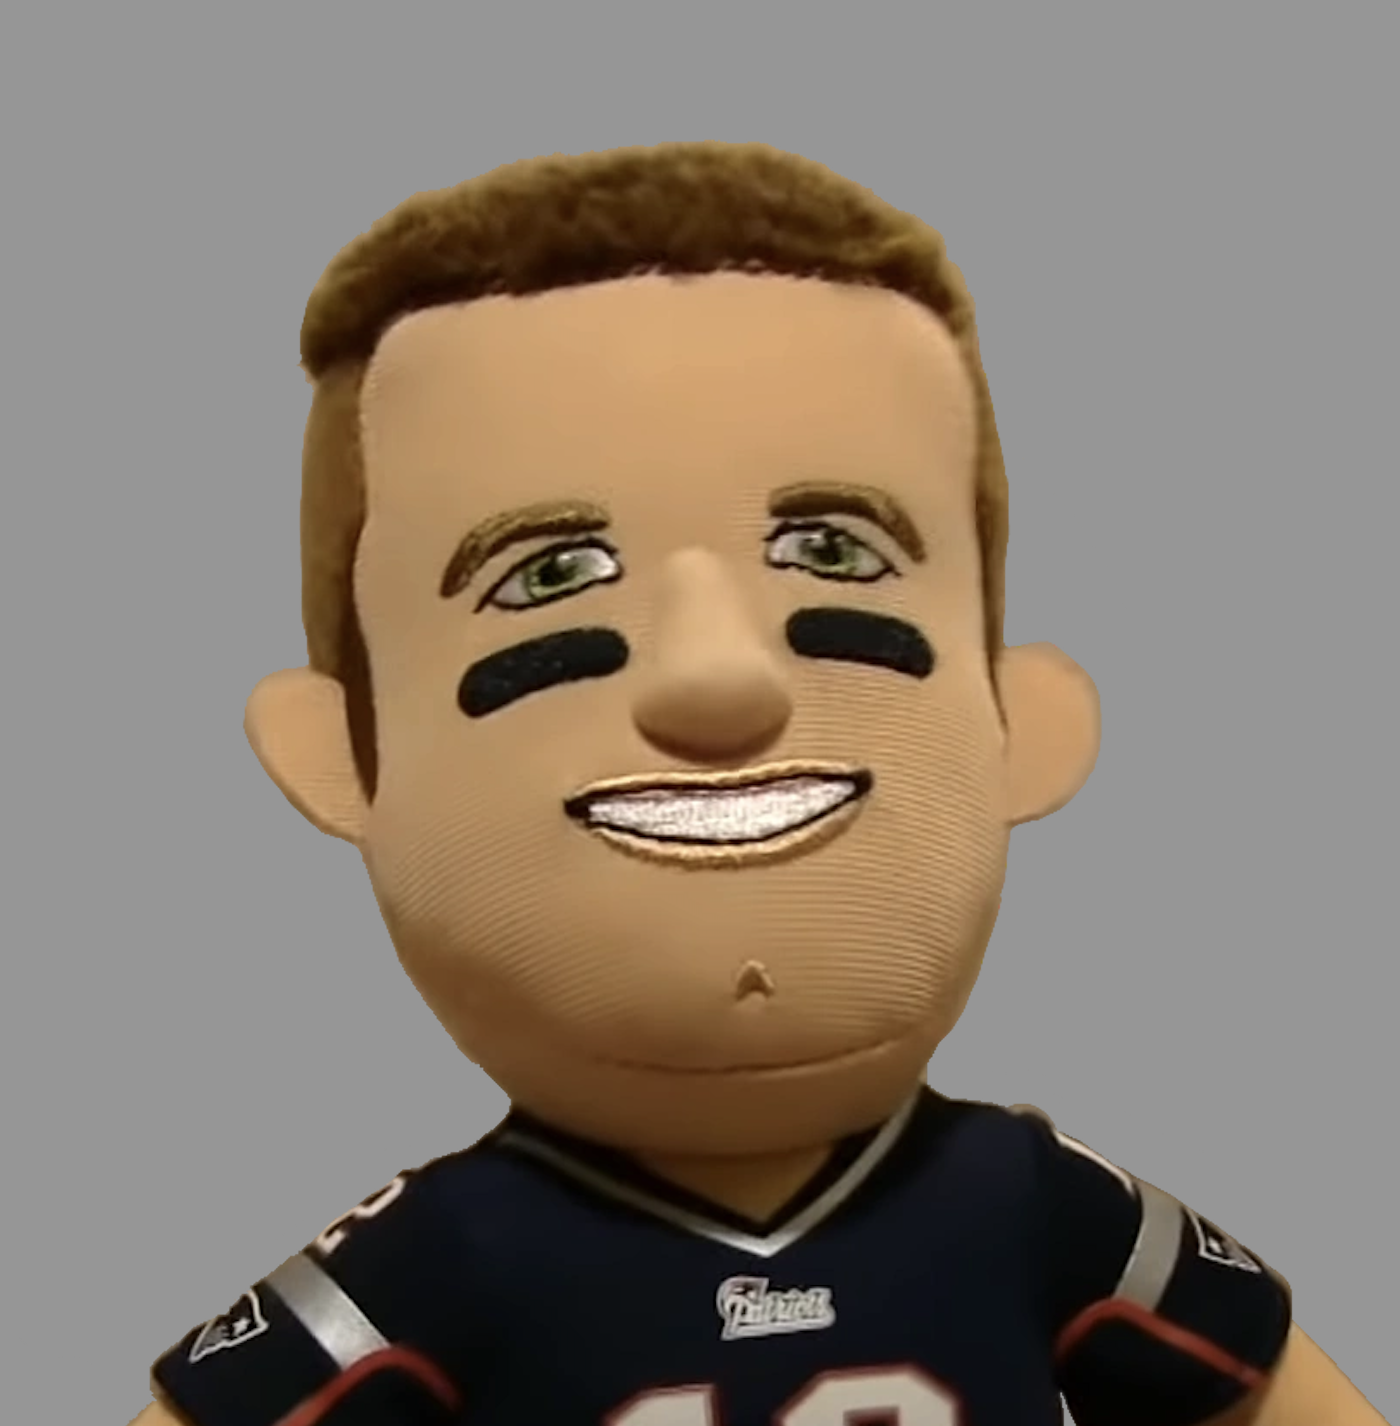

In [ ]:
#######################################################
#      upload your
#      set your image and driving video paths
#######################################################
# set image path taht will be used further
image_path = data_path + 'tb3.png'

Image(image_path)

## upload a mp4 video

In [ ]:
#######################################################
#      set your image and driving video paths
#######################################################
# set video path taht will be used further
video_path = data_path + 'clip2.mp4'

mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


# Set up the model

three ways to display the result

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

def display_only_output(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        #cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

def display_output_and_original(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        cols.append(driving[i])
        #cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

# Create a model and load encodings and perform image animation

**YAML configs**

Different models are trianed with different configuration files (.yaml). One for each dataset.
We are generating a new deepfake face video, so we use vox-256.yaml, which is used to train the VoxCeleb Dataset: https://www.robots.ox.ac.uk/~vgg/data/voxceleb/
See https://github.com/AliaksandrSiarohin/first-order-model/blob/master/config/taichi-256.yaml to get description of each parameter.


**Pre-trained checkpoints**

Checkpoints for different modles can be found under following link: https://drive.google.com/drive/folders/1PyQJmkdCsAkOYwUyaj_l-l0as-iLDgeH

In [ ]:
#######################################################
#      download the pre-trained model and set the corresponding yaml
#      We are generating a new deepfake face video, so we use vox-256.yaml.
#      vox-256.yaml is used to train the VoxCeleb Dataset: https://www.robots.ox.ac.uk/~vgg/data/voxceleb/
#######################################################

import gdown
url = 'https://drive.google.com/u/0/uc?id=19d9ZJYAMsNNQZd4AzIWCw4sF1EaNYuJ3&export=download'
output = data_path + 'vox-cpk.pth.tar'
gdown.download(url, output, quiet=False)

from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='first-order-model/config/vox-256.yaml',
                                          checkpoint_path=data_path + 'vox-cpk.pth.tar')


Downloading...
From: https://drive.google.com/u/0/uc?id=19d9ZJYAMsNNQZd4AzIWCw4sF1EaNYuJ3&export=download
To: /content/deepfake/vox-cpk.pth.tar
100%|██████████| 729M/729M [00:04<00:00, 160MB/s]


# Generate new videos

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte


# read the image and the video
source_image = imageio.imread(image_path)
driving_video = imageio.mimread(video_path)

# resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=False)

#######################################################
#      you can rename the new generated video
#######################################################
# save resulting video
imageio.mimsave(data_path + 'generated.mp4', [img_as_ubyte(frame) for frame in predictions])

HTML(display(source_image, driving_video, predictions).to_html5_video())

  0%|          | 0/80 [00:00<?, ?it/s]

# Steps for editing generated video

You'll need to speed up the generated video 3x so that it'll sync up with whatever music. You can use kapwing or another editor for this. If you're doing this in kapwing, you'll first need to speed it up 2x and speed up the resulting video again 1.5x. This is because kapwing doesn't have a 3x speed feature.

------------------------